
# Project: Investigate a Dataset " No-show appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
       
1-Dataset brief introduction :
------------------------------
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
   
       -‘ScheduledDay’ tells us on what day the patient set up their appointment. 
       -‘Neighborhood’ indicates the location of the hospital. 
       -‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
        -No-show: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
    
   
 2-Data exploration questions to be analyszed :
 -------------------------------------------------------------------
    - Describing the questions to be explored over the report. 
    - Analysis must be built around of at least one dependent variable and three independent variables
 
3- Example Questions :
----------------------------------
 What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
 
     1. Does the location of the hospital affects  the patien's show up or not ?
     2. Does  (Age / Gender) affect the patien's show up or not ?
     3. what is the relationship between age an diseases ?
 

# Import the required libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

    1- Load the dataset 
    2- Check for cleanliness
    3- Clean your dataset for analysis

### General Properties

In [119]:
# Load your dataset 
df= pd.read_csv("appointment_records.csv")
#view some lines of the dataset to make sure its loaded successfully 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [120]:
# check the shape of the dataset 
df.shape

(110527, 14)

In [121]:
#view the table structure for columns, datatypes ,null values..etc 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [122]:
#by looking at df.info() result there are no null values and here's the code to insure that programatically
df.isnull().sum().sum()

0

In [123]:
#PatientId must be changed to int type
#AppointmentDay,ScheduledDay must be changed to datetime type
df['PatientId']=df['PatientId'].astype(int)
df['ScheduledDay']  =pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [124]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [125]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [126]:
#show the statistics of the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45a915e160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f45a8b204e0>]], dtype=object)

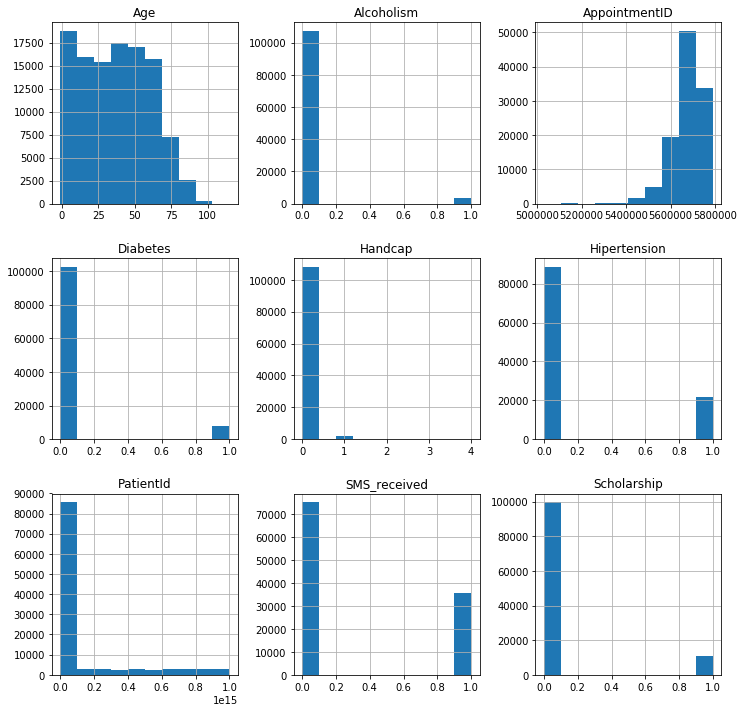

In [127]:
#list histograms for the dataset variables 
df.hist(figsize=(12,12))

In [128]:
#list the counts of columns' values 
for i in df.columns:
  print('\n')
  print (i)
  print(df[i].value_counts())



PatientId
822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
75797461494159     62
258424392677       62
871374938638855    62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
81894521843749     42
9452745294842      42
188232341789524    40
2271579924275      38
9496196639835      38
13364929297498     37
1484143378533      35
986162815579582    34
88834999836575     34
712458866975343    33
6128878448536      30
416755661551767    30
81213966782532     29
8634164126317      24
36994987339512     23
                   ..
98683352133221      1
5394313945329       1
48689197872217      1
9675119787546       1
763619586595        1
867726299814126     1
77425139319169      1
39423418767468      1
961392519656997     1
737858311826761     1
271517596623238     1
8249496395977       1
137479426839        1
6529316371746       

In [129]:
#show column names for ease of use in my coding
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

check all column unique values in order to check if there are incorrect values 
---------------

In [130]:
#check for incorrect Gender values
np.unique(df['Gender'])

array(['F', 'M'], dtype=object)

In [131]:
#check for incorrect Scholarship values
np.unique(df['Scholarship'])

array([0, 1])

In [132]:
#check for incorrect Hipertension values
np.unique(df['Hipertension'])

array([0, 1])

In [133]:
#check for incorrect Diabetes values
np.unique(df['Diabetes'])

array([0, 1])

In [134]:
#check for incorrect Alcoholism values
np.unique(df['Alcoholism'])

array([0, 1])

In [135]:
#check for incorrect Handcap values
np.unique(df['Handcap']) 

array([0, 1, 2, 3, 4])

In [136]:
#check for incorrect SMS_received values
np.unique(df['SMS_received'])

array([0, 1])

In [137]:
#check for incorrect No-show values
np.unique(df['No-show']) 

array(['No', 'Yes'], dtype=object)

In [138]:
#check for incorrect age values
np.unique(df['Age'])

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [139]:
#view the data of incorrect age = -1 
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [140]:
#check for duplications 
df.duplicated().sum()

0

# Observations
After viewing the table structure and investigating the dataset using appropriate pandas commands
--------------------------------------------------------------------------
    - No duplicates to be deleted 
    - No columns to be dropped 
    - No null values to be filled 
    - PatientId must be changed to int type
    - ScheduledDay must be changed to date type
    - AppointmentDay must be changed to date type
    - Change No-show values to binary Yes(didn't show up): 0 and No(attended) : 1
    - Change Gender  values to binary F(Female): 2 and M(Male) : 1

some notes observed after viewing table statistics:
--------------------------------------------------------------------------
    - The mean age is 37 yrs 
    - The majority of the patients rely in ages  37- 55 
    - Min age is -1 (which is not reliable so we need to check for incorrect data)  
      (this is only 1 record so we will drop it it will not affect the dataset)
    - Max age is 115
    



### Data Cleaning

In [141]:
#delete the record with age -1 
df.drop(df.index[df['Age']== -1], inplace = True)
df[df['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [142]:
#Change No-show values to binary Yes(didn't show up): 0 and No(attended) : 1
df["No-show"].replace({"Yes": 0, "No": 1}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [143]:
#Change Gender  values to binary F (Female): 2 and M (Male) : 1
df.Gender.replace(['M','F'], [1 , 2], inplace=True)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,2,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,2,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,2,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,2,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis
      
     - check the relationships between variables.

### Research Question 1 :
--------------------------------

 what is the relationship between age and different kinds of diseases ?
------------

In [144]:
df.corr()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,1.000000,0.004023,-0.007898,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,0.001456
AppointmentID,0.004023,1.000000,-0.018506,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,0.162597
Gender,-0.007898,-0.018506,1.000000,0.106452,0.114296,0.055722,0.032556,-0.106166,-0.022813,0.046302,-0.004122
Age,-0.004121,-0.019106,0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
Scholarship,-0.002877,0.022619,0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
Hipertension,-0.006436,0.012759,0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
Diabetes,0.001608,0.022632,0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
Alcoholism,0.011014,0.032946,-0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
Handcap,-0.007915,0.014107,-0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
SMS_received,-0.009742,-0.256613,0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428


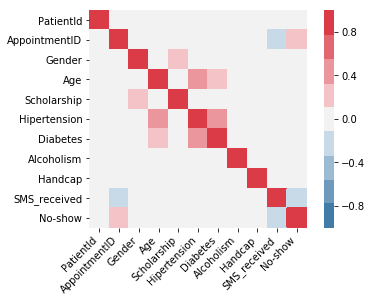

In [145]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Heat Map observations: 
---------------------------------        
        - Age & diabetes (approx. 0.3)
There is a weak positive correlation between getting older and being a Diabetes patient 
    - It's not important to have diabetes while getting older
        
        - Age &hypertension  (0.5) 
There is a moderate positive correlation between getting older and being a hypertension patient 
    - There is a medium probability to become a hypetension patient while getting older 

        - diabetes & hypertension (0.4)
There is a moderate positive correlation between having diabeties and hypertension 
    - being a hypertension patient increase the probability of getting diabetes and Vice Versa.
        
        -SMS_received & No-show   (-0.1)
There is a weak negative correlation between recieving a confirmation sms and attending the appointment.

### Research Question 2 :
--------------------------------

Does  Age / Gender affect the patient's show up or not ?
------------
Hint:

    -No-show Values :           - Gender Values :
    0 : No show                  1 : Male
    1 : Attended                 2 : Female


In [146]:
df.groupby('No-show')['Gender'].value_counts()

No-show  Gender
0        2         14594
         1          7725
1        2         57245
         1         30962
Name: Gender, dtype: int64

In [147]:
df.groupby('No-show')['Gender'].value_counts().max()

57245

In [148]:
df.groupby('No-show')['Gender'].value_counts().min()

7725

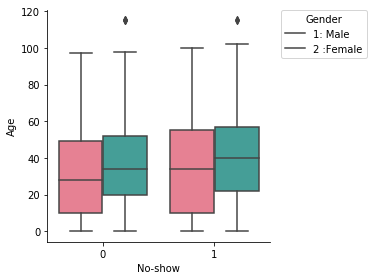

In [149]:
g = sns.factorplot("No-show", "Age","Gender",  data=df, kind="box", palette="husl",legend=False)
plt.legend(title='Gender',bbox_to_anchor=(1.05, 1) , labels=['1: Male', '2 :Female'], borderaxespad=0.)
plt.show()

Observation : 
----------
    
    - Females are more committed and they attend more appointments than males do.
    - Most of the attended patients their ages relies between (20-48) years 
    - Most of the No-show patients their ages relies between  (23-55) years   
    - Only Few outliers in our dataset
    

### Research Question 3 
-----------------------------------

what are the top locations with no show patients ?
----------------------


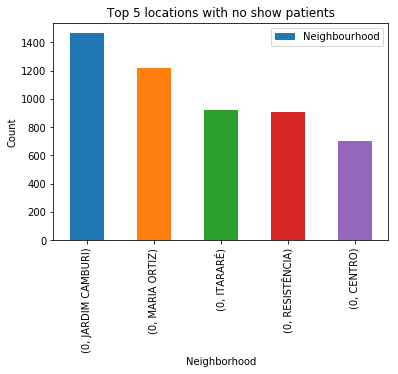

In [150]:

df.groupby(df['No-show'])['Neighbourhood'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 locations with no show patients')
plt.legend()
plt.xlabel('Neighborhood')
plt.ylabel('Count');


Figure Observation :
----

    -This figure lists the Top 5 locations for patients who didn't attend the appointment 

    -JARDIM CAMBURI has the most no show patients 


Coclusions :
----------

This research was conducted with a majority of the patients whose age relies between  37- 55 years.
While investigating this dataset I found an interesting insights: 

 	- Females are more committed and they attend more appointments than males do.
	- Most of the attended patients their ages relies between (20-48) years.
	- There is a moderate positive correlation between getting older and being a hypertension patient.
	- Being a hypertension patient increase the probability of getting diabetes and Vice Versa.
	- There's no certain relationship between recieving a confirmation sms and attending the appointment.
	- Certain neighborhoods have a high rate of attending their medical appointments.


Limitations:
------
The provided dataset is shallow in information and the time period provided in can't rely on .
Unfortunately the dataset answered some of my general research questions but it couldn't provaide a
certain causation for the trends.


In [151]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0